In [9]:
import os
import numpy as np
import dbpy
import sys
import matplotlib.pyplot as plt
from math import *
import stpy
import ippy

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from IPython.display import HTML
HTML("""
<script>
window.IPython = {
  notebook: {
    kernel: { execute: function(cmd) { console.log("kernel exec blocked:", cmd); } }
  }
};
</script>
""")

In [11]:
#output: -1: not yet exist, 0 = stopped (ready to read), 1: paused, 2: running)
run_newest = dbpy.read_runnumber_newest(3)
print(run_newest)

1616940


In [35]:
from mpccd import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
detectorID_MPCCD3 = 'MPCCD-1B1-M03-006'
detectorID_MPCCD2 = 'MPCCD-1N0-M06-004'
detectorID_MPCCD1 = 'MPCCD-1N0-M07-005'


base_path = "."

MPCCD_3 = MPCCDProcessing(base_path, detectorID_MPCCD3)
MPCCD_2 = MPCCDProcessing(base_path, detectorID_MPCCD2)
MPCCD_1 = MPCCDProcessing(base_path, detectorID_MPCCD1)

In [24]:
#dbpy.read_runinfo(bl, run)
#output: dictionary of run information
run = 1616809
run_info = dbpy.read_runinfo(3, run)
print(run_info)

{'starttime': 1762486057.900477, 'stoptime': 1762486225.720905, 'total_tagnumber': 10000, 'start_tagnumber': 445153982, 'end_tagnumber': 445163982, 'hightagnumber': 202502, 'comment': 'on bragg search with the mpccd -- the plan is to work with this detector until we understand the data taken with the citius better. CITIUS now included in DAQ', 'fy_id': 'exp2025-2', 'detectors': 'CITIUS1,MPCCD-1B1-M03-006,MPCCD-1N0-M06-004,MPCCD-1N0-M07-005,stor1_09,stor1_12,stor1_11', 'runtype': '', 'stationnumber': 4, 'runstatus': 0}


In [4]:
# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD
runNo = 1616809
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_3.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

# Select ROI detector
x1, y1, x2, y2 = 410, 500, 430, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

all_values = MPCCD_3.create_run_histograms(x1, y1, x2, y2, run = runNo, runDark = runDarkNo)

all_values = all_values[(all_values > np.percentile(all_values, 1)) &
                        (all_values < np.percentile(all_values, 99))]

plt.figure()
plt.hist(all_values, bins=400, histtype='step', color='black')
plt.xlabel("Pixel intensity (ADU)")
plt.ylabel("Counts (all shots combined)")
plt.title(f"{detectorID_MPCCD3} ROI histogram (10 keV beam)")
plt.show()

NameError: name 'MPCCD_3' is not defined

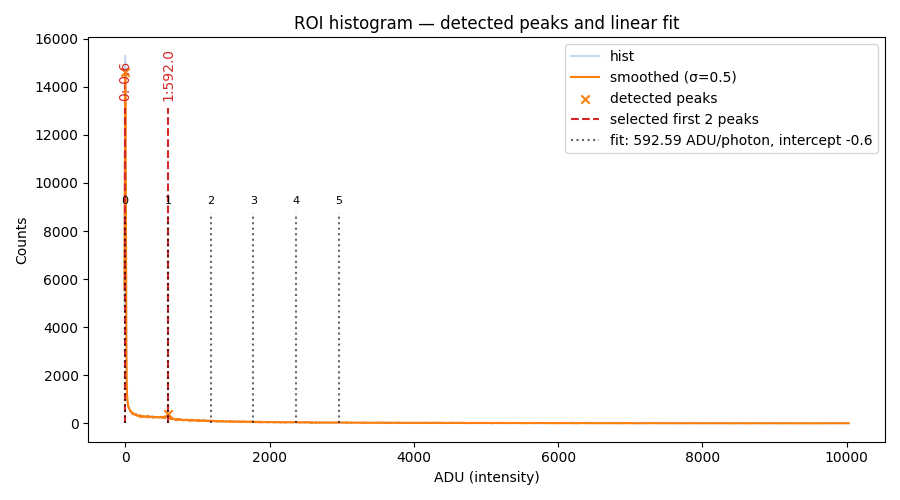

Selected peak ADU positions (first peaks): [-5.6000e-01  5.9203e+02]
Slope (ADU / photon): 592.5900
Intercept (ADU): -0.56
R^2 of linear fit (selected peaks): 1.0000
slope: 592.5899518963465, intercept: -0.5619847747758706


In [17]:
results = MPCCD_3.find_and_fit_peaks(all_values, nbins=2000, smooth_sigma=0.5, peak_prominence_frac=0.005, n_peaks_needed=2)

print(f'slope: {MPCCD_3.slope}, intercept: {MPCCD_3.intercept}')

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M06-004
900
Run: 1616851
Number of images: 300
Detector ID: MPCCD-1N0-M06-004
Dark runs subtracted
200

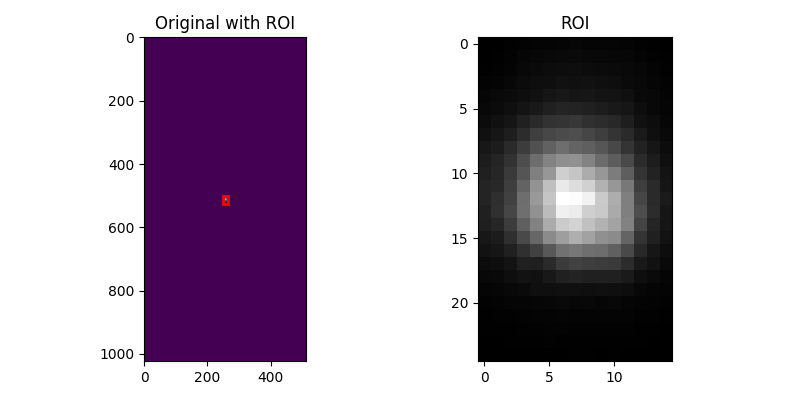

Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M06-004
900
Run: 1616851
Number of images: 300
Detector ID: MPCCD-1N0-M06-004
(300, 1024, 512)
Dark runs subtracted
200

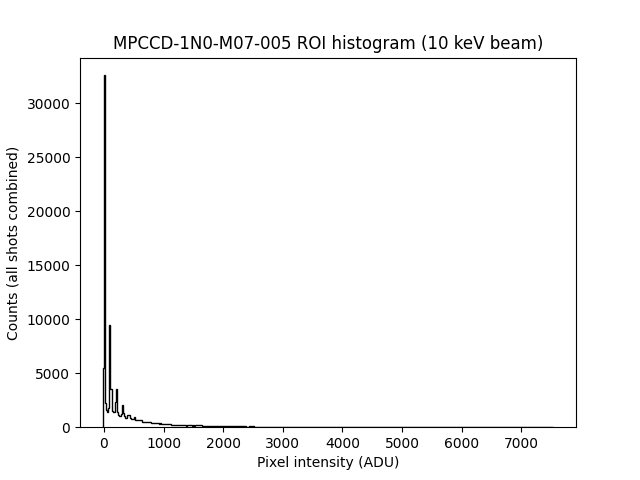

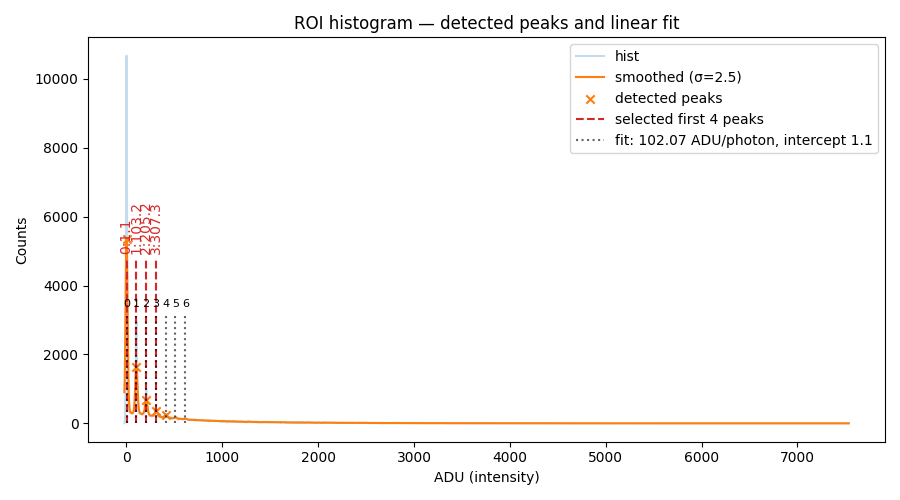

Selected peak ADU positions (first peaks): [  1.08 103.15 205.22 307.3 ]
Slope (ADU / photon): 102.0722
Intercept (ADU): 1.08
R^2 of linear fit (selected peaks): 1.0000
slope: 102.07224123012749, intercept: 1.0803570112485732


In [22]:
# read in a run and minus the dark #1616809 Direct reference at 2nd MPCCD
runNo = 1616851
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_2.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

# Select ROI detector
x1, y1, x2, y2 = 250, 500, 265, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

all_values = MPCCD_2.create_run_histograms(x1, y1, x2, y2, run = runNo, runDark = runDarkNo)

# all_values = all_values[(all_values > np.percentile(all_values, 1)) &
#                         (all_values < np.percentile(all_values, 99))]

plt.figure()
plt.hist(all_values, bins=400, histtype='step', color='black')
plt.xlabel("Pixel intensity (ADU)")
plt.ylabel("Counts (all shots combined)")
plt.title(f"{detectorID_MPCCD1} ROI histogram (10 keV beam)")
plt.show()

results = MPCCD_2.find_and_fit_peaks(all_values, nbins=2000, smooth_sigma=2.5, peak_prominence_frac=0.005)

print(f'slope: {MPCCD_2.slope}, intercept: {MPCCD_2.intercept}')

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

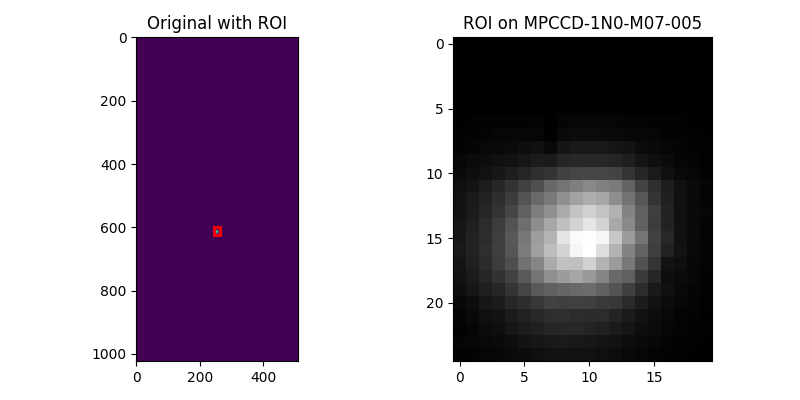

Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
(300, 1024, 512)
Dark runs subtracted
200

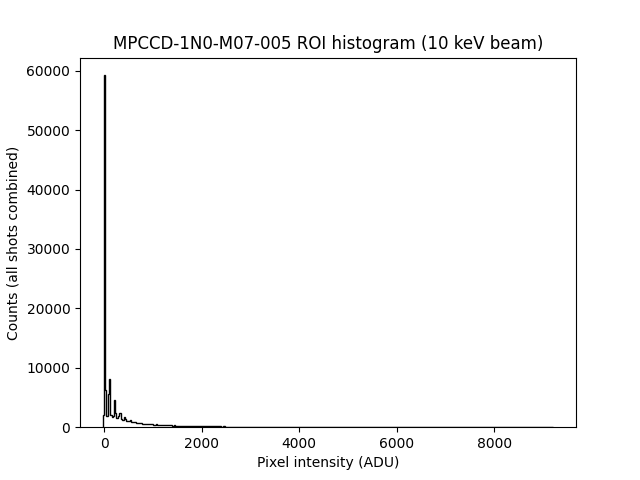

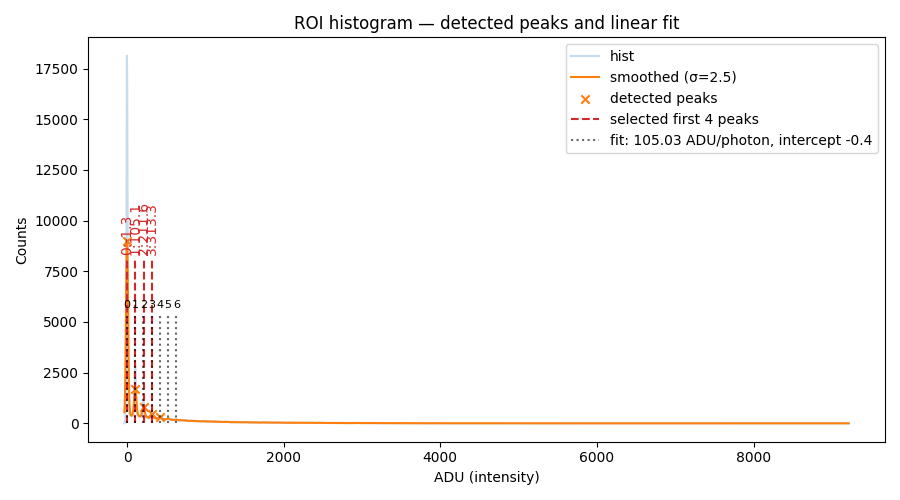

Selected peak ADU positions (first peaks): [ -1.29 105.13 211.55 313.35]
Slope (ADU / photon): 105.0327
Intercept (ADU): -0.36
R^2 of linear fit (selected peaks): 0.9999
slope: 105.03266770861711, intercept: -0.3626125344490335


In [8]:
# read in a run and minus the dark #1616809 Direct reference at 1st MPCCD
runNo = 1616852
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

# Select ROI detector
x1, y1, x2, y2 = 245, 600, 265, 625  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title(f"ROI on {detectorID_MPCCD1}")

plt.tight_layout()
plt.show()

all_values = MPCCD_1.create_run_histograms(x1, y1, x2, y2, run = runNo, runDark = runDarkNo)

# all_values = all_values[(all_values > np.percentile(all_values, 1)) &
#                         (all_values < np.percentile(all_values, 99))]

plt.figure()
plt.hist(all_values, bins=400, histtype='step', color='black')
plt.xlabel("Pixel intensity (ADU)")
plt.ylabel("Counts (all shots combined)")
plt.title(f"{detectorID_MPCCD1} ROI histogram (10 keV beam)")
plt.show()

results = MPCCD_1.find_and_fit_peaks(all_values, nbins=2000, smooth_sigma=2.5, peak_prominence_frac=0.005)

print(f'slope: {MPCCD_1.slope}, intercept: {MPCCD_1.intercept}')

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

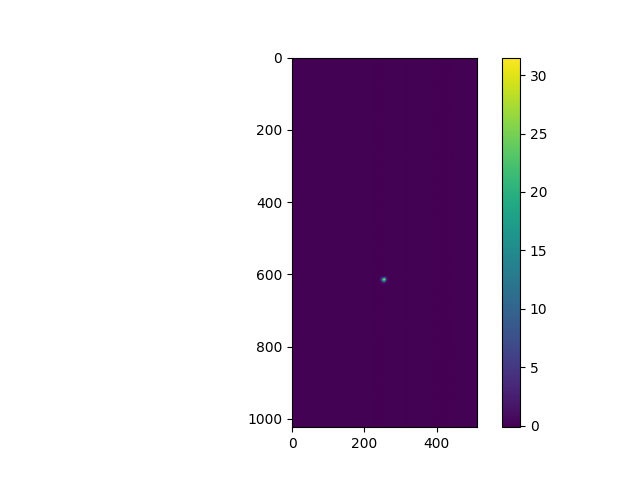

In [224]:
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=True)
plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()

In [52]:
from mpccd import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
detectorID_MPCCD1 = 'MPCCD-1N0-M07-005'

base_path = "."

MPCCD_1 = MPCCDProcessing(base_path, detectorID_MPCCD1)# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD

In [1]:
run_list = [runDarkNo]
imDarkall_list, imDarkave_list = MPCCD_1.create_average_dark(run_list, threshold = threshold, calibrate=False)
avDark_im = np.sum(imDarkall_list,0) / len(imDarkall_list)

NameError: name 'runDarkNo' is not defined

In [ ]:
np.save(os.path.join(MPCCD_1.base_path, f'avDark_im_runs_{run_list[0]}-{run_list[-1]}_{detectorID_MPCCD1}'), avDark_im)

In [3]:
runNo = 1616852
run_list = [runNo]
threshold=[-100, 1e+6]
im2Dall, im2Dave = MPCCD_1.load_multiple_images(run_list = runNo, imDark = avDark_im, threshold=threshold, calibrate=False)

NameError: name 'MPCCD_1' is not defined